# **ANÁLISE EXPLORATÓRIA DOS DADOS DA ANVISA**

## **Importando os dados**

In [38]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [39]:
#lendo o arquivo

from google.colab import files
uploaded = files.upload()
import io
covid = pd.read_csv(io.BytesIO(uploaded['dataset_anvisa.csv']))

#covid = pd.read_csv('dataset_opas.csv')

covid.head()

Saving dataset_anvisa.csv to dataset_anvisa (1).csv


,Unnamed: 0,title,created,link,summary,full_created,full_content
0,0,Anvisa alerta sobre instabilidade no sistema S...,09/11/2021 -,https://www.gov.br/anvisa/pt-br/assuntos/notic...,Sistema apresenta lentidão no processamento e ...,09/11/2021 14h50,\nA Anvisa informa que o Sistema Nacional de G...
1,1,Embarque em cruzeiros exige vacinação completa...,09/11/2021 -,https://www.gov.br/anvisa/pt-br/assuntos/notic...,Vai viajar em navio de cruzeiro? Veja o que vo...,09/11/2021 12h32,\nPelo menos 25 passageiros de navios de cruze...
2,2,Confira os resultados do monitoramento de dese...,09/11/2021 -,https://www.gov.br/anvisa/pt-br/assuntos/notic...,Documento traz dados sobre o alcance e o cumpr...,09/11/2021 12h11,\nJá está disponível para consulta o Relatório...
3,3,Acompanhe a reunião da Dicol desta quarta-feira,09/11/2021 -,https://www.gov.br/anvisa/pt-br/assuntos/notic...,Diretores se reúnem a partir das 9h30. Acompan...,09/11/2021 11h12,\n22ª Reunião Ordinária Pública da Diretoria C...
4,4,Anvisa alerta sobre tentativa de fraude por e-...,08/11/2021 -,https://www.gov.br/anvisa/pt-br/assuntos/notic...,Usuários relataram o recebimento de e-mails de...,08/11/2021 12h18,\nA Anvisa alerta ter recebido reclamações de ...


## **Removendo Duplicadas**

In [40]:
covid['dup'] = covid.drop(columns=['Unnamed: 0']).duplicated(subset=None, keep='first') #cria um coluna de booleanos determinando se tem linhas duplicadas (Tr)

In [41]:
covid['dup'].sum() #Como a soma é zero, não temos valores duplicados

0

## **Analisando se existem valores vazios**

In [42]:
covid.drop(columns=['Unnamed: 0']).isnull().sum() #transforma em uma matriz de booleanos verificando se o item da céliula é vazio e depois soma

#Nas colunas summary e full_created temos alguns valores vazios

title            0
created          0
link             0
summary         15
full_created     0
full_content     9
dup              0
dtype: int64

In [51]:
#Substitui os vazios da coluna full_content pelo texto do summary (onde tinha summary)

for i in range(0,len(covid)):
  if (pd.isnull(covid['full_content'][i])):
    covid['full_content'][i] = covid['summary'][i]

In [52]:
covid.drop(columns=['Unnamed: 0']).isnull().sum()

#Apenas 02 valores de full_content estão vazios, podemos removê-los

title            0
created          0
link             0
summary         15
full_created     0
full_content     2
dup              0
dtype: int64

In [59]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1131 entries, 0 to 1130
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    1131 non-null   int64 
 1   title         1131 non-null   object
 2   created       1131 non-null   object
 3   link          1131 non-null   object
 4   summary       1116 non-null   object
 5   full_created  1131 non-null   object
 6   full_content  1129 non-null   object
 7   dup           1131 non-null   bool  
dtypes: bool(1), int64(1), object(6)
memory usage: 63.1+ KB


In [61]:
covid = covid[covid['full_content'].notnull()]
covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1129 entries, 0 to 1130
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    1129 non-null   int64 
 1   title         1129 non-null   object
 2   created       1129 non-null   object
 3   link          1129 non-null   object
 4   summary       1116 non-null   object
 5   full_created  1129 non-null   object
 6   full_content  1129 non-null   object
 7   dup           1129 non-null   bool  
dtypes: bool(1), int64(1), object(6)
memory usage: 71.7+ KB


## **Carregando as stopwords**

In [62]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


stop_words = set(stopwords.words('portuguese'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [70]:
#Acrescentarei manualmente a palavra "sobre" às stop words, pois não é relevante e estava ocorrendo muito

stop_words.add('sobre')
#stop_words.add('ser')
#stop_words.add('sobre')

TypeError: ignored

## **Pré processamento dos dados**

In [68]:
#Criaremos a função para pré processamento dos dados

def preprocess(raw_text):
    
    #Expressão regular para manter apenas letras no texto 
    letters_only_text = re.sub("[^a-zA-ZãõÃÕçÇáéíóúÁÉÍÓÚâêîôîÂÊÎÔÛ]", " ", raw_text) #DUVIDA: COMO RESUMIR ESSE CÓDIGO? OU FIZ CERTO? COMO REMOVER O \n TAMBÉM

    #Converter o texto todo para minúsculo e fazer um split -> convert string into list ( 'hello world' -> ['hello', 'world'])
    words = letters_only_text.lower().split()

    cleaned_words = []
    
    #remover stopwords
    for word in words:
      if word not in stop_words:
        cleaned_words.append(word)
    
    #transformar a lista em uma string novamente
    return " ".join(cleaned_words)

In [65]:
covid['prep'] = covid['full_content'].apply(preprocess) #cria uma nova coluna 'prep' que trará os dados pré processados, removendo pontos e stop words

In [66]:
covid.iloc[0,8]

'anvisa informa sistema nacional gerenciamento produtos controlados sngpc passando períodos instabilidade desde última sexta feira outubro instabilidade culmina lentidão utilização funcionalidades sistema acarreta erros acesso gera demora processamento validação arquivos xml gerência geral monitoramento produtos sujeitos vigilância sanitária ggmon gerência geral tecnologia informação ggtin empenhadas solucionar instabilidade regularizar acesso utilização envio arquivos xml meio sistema conforme artigo resolução diretoria colegiada rdc deverá ser objeto autuação falta regularidade transmissão movimentações emissão relatórios motivo estritamente instabilidade operacional próprio sngpc dessa forma falta envio arquivos xml período momento comprovadamente ocorrido devido dificuldade acesso sistema estará amparada resolução citada'

In [67]:
covid.iloc[0,6]

'\nA Anvisa informa que o Sistema Nacional de Gerenciamento de Produtos Controlados (SNGPC) está passando por períodos de instabilidade desde a última sexta-feira, 5 de outubro.\nA instabilidade culmina em lentidão para utilização das funcionalidades do sistema, acarreta erros de acesso e gera demora no processamento e na validação de arquivos XML.\nA Gerência-Geral de Monitoramento de Produtos Sujeitos à Vigilância Sanitária (GGMON) e a Gerência-Geral de Tecnologia da Informação (GGTIN) estão empenhadas em solucionar a instabilidade e regularizar o acesso, a utilização e o envio de arquivos XML por meio do sistema.\nConforme o artigo 33 da Resolução da Diretoria Colegiada (RDC) 22/2014, “Não deverá ser objeto de autuação a falta de regularidade na transmissão das movimentações e emissão de relatórios quando o motivo for estritamente instabilidade operacional do próprio SNGPC.”\nDessa forma, a falta de envio de arquivos XML no período de 5/10 até o momento, que comprovadamente tenha oc

## **Palavras mais comuns**

In [69]:
from collections import Counter
Counter(" ".join(covid["prep"]).split()).most_common(10) #Apresenta as 10 palavras mais comuns nos textos

[('anvisa', 3594),
 ('saúde', 1428),
 ('uso', 1343),
 ('agência', 1317),
 ('vacina', 1316),
 ('ser', 1103),
 ('medicamentos', 1103),
 ('produtos', 1071),
 ('covid', 922),
 ('informações', 875)]

In [71]:
from nltk.util import ngrams


all_words = '' 

#looping through all incidents and joining them to one text, to extract most common words
for arg in covid["prep"]: 
    tokens = arg.split()  
    all_words += " ".join(tokens)+" "

n_gram = 2
n_gram_dic = dict(Counter(ngrams(all_words.split(), n_gram))) #Cria um ngram de 2 palavras


n_gram_ordenado = []
for i in sorted(n_gram_dic, key = n_gram_dic.get, reverse=True): #Ordena os ngramas do maior para o menor e coloca em uma lista
    n_gram_ordenado.append([i, n_gram_dic[i]])

n_gram_ordenado[:5]



[[('diretoria', 'colegiada'), 559],
 [('uso', 'emergencial'), 460],
 [('vigilância', 'sanitária'), 348],
 [('contra', 'covid'), 320],
 [('boas', 'práticas'), 315]]

## **Manipulando as datas no dataset**

In [78]:
import datetime as dt

covid['created'] = covid['created'].apply(lambda x: dt.datetime.strptime(x.replace(' -',''), '%d/%m/%Y'))


## **Análises - Período Todo**

In [79]:
#Total de notícias do dataset

print(f'Este dataset possui um total de {len(covid)} notícias.')

Este dataset possui um total de 1129 notícias.


In [89]:
#Timespan do dataset: as notícias vão de quando até quando?

ultima_noticia = dt.datetime.strftime(max(covid['created']), '%d/%m/%Y')
primeira_noticia = dt.datetime.strftime(min(covid['created']), '%d/%m/%Y')

print(f'As notícias do estudo vão de {primeira_noticia} até {ultima_noticia}')

As notícias do estudo vão de 01/01/2011 até 09/11/2021


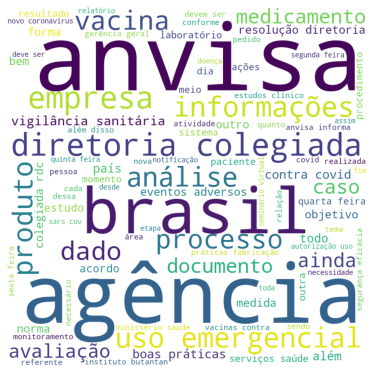

In [84]:

#nice library to produce wordclouds
from wordcloud import WordCloud

import matplotlib.pyplot as plt
# if uising a Jupyter notebook, include:
%matplotlib inline

all_words = '' 

#looping through all incidents and joining them to one text, to extract most common words
for arg in covid["prep"]: 
    tokens = arg.split()  
    all_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700, 
                background_color ='white', 
                min_font_size = 10).generate(all_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

## **Análises - Período Covid**

In [96]:
filtro = covid[covid['created'] >= dt.datetime.strptime('30/01/2020', '%d/%m/%Y')]

In [98]:
covid[covid['created'] < dt.datetime.strptime('30/01/2020', '%d/%m/%Y')]

,Unnamed: 0,title,created,link,summary,full_created,full_content,dup,prep
1126,1126,Paraíba centraliza atendimento ao público no C...,2019-12-16,https://www.gov.br/anvisa/pt-br/assuntos/notic...,Atendimento ao público na Paraíba está sendo r...,16/12/2019 00h00,\nO atendimento ao público na Paraíba está sen...,False,atendimento público paraíba sendo realizado so...
1127,1127,Medicamentos veterinários: uso inadequado por ...,2019-10-25,https://www.gov.br/anvisa/pt-br/assuntos/notic...,Fique atento: o consumo inadequado de produtos...,25/10/2019 11h06,\nA Anvisa alerta que o uso de medicamentos ve...,False,anvisa alerta uso medicamentos veterinários hu...
1128,1128,Atualização vacina de Oxford: Anvisa recebe da...,2011-01-01,https://www.gov.br/anvisa/pt-br/assuntos/notic...,A Agência reitera que está comprometida com a ...,01/01/2011 21h15,\nA Agência Nacional de Vigilância Sanitária r...,False,agência nacional vigilância sanitária recebeu ...
1129,1129,Nota da Anvisa sobre anúncio da retomada dos e...,2011-01-01,https://www.gov.br/anvisa/pt-br/assuntos/notic...,Para que a reativação do estudo clínico ocorra...,01/01/2011 21h00,\nA Agência Nacional de Vigilância Sanitária f...,False,agência nacional vigilância sanitária informad...
1130,1130,Anvisa e agência inglesa discutem vacina de Ox...,2011-01-01,https://www.gov.br/anvisa/pt-br/assuntos/notic...,Agências brasileira e inglesa tiveram reunião ...,01/01/2011 00h00,"\nA Anvisa realizou, nesta sexta-feira (11/9),...",False,anvisa realizou nesta sexta feira reunião agên...


In [93]:
#Total de notícias do dataset

print(f'Este dataset possui um total de {len(filtro)} notícias.')

Este dataset possui um total de 1124 notícias.


In [100]:
#Timespan do dataset: as notícias vão de quando até quando?

ultima_noticia = dt.datetime.strftime(max(filtro['created']), '%d/%m/%Y')
primeira_noticia = dt.datetime.strftime(min(filtro['created']), '%d/%m/%Y')

print(f'As notícias do estudo vão de {primeira_noticia} até {ultima_noticia}')

As notícias do estudo vão de 19/03/2020 até 09/11/2021


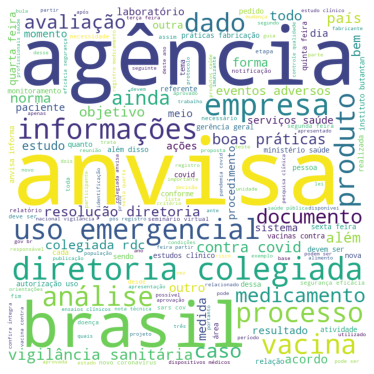

In [101]:

#nice library to produce wordclouds
from wordcloud import WordCloud

import matplotlib.pyplot as plt
# if uising a Jupyter notebook, include:
%matplotlib inline

all_words = '' 

#looping through all incidents and joining them to one text, to extract most common words
for arg in filtro["prep"]: 
    tokens = arg.split()  
    all_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700, 
                background_color ='white', 
                min_font_size = 10).generate(all_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()